# Laptop Price Prediction and Recommendation System

This project is focused on building a machine learning model that predicts the price of laptop based on its specifications. In addition to this, a big part of this project is dedicated to building a recommendation model that recommends laptop based on user inputted specifications and price. The project is divided into 5 parts namely.

- Data importing

- Data Cleaning

- Exploratory Data Analysis

- Feature Engineering

- Modeling

### Importing Required Modules

In [1]:
# analysis
import pandas as pd
import numpy as np
# Graphing libraries
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data
The laptop dataset is loaded into df with read_csv function in pandas. Preview of dataset can be seen below.

In [2]:
df = pd.read_csv('laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.shape

(1303, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


### Data Cleaning

Duplication removal

In [5]:
df.duplicated().sum()

0

Missing values

In [6]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

Removing unnamed column

In [7]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


Manipulating RAM column to only include integer values and weight column to include float values.

In [8]:
df['Ram'] = df['Ram'].str.replace('GB', '').astype('int')
df['Weight'] = df['Weight'].str.replace('kg', '').astype('float')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


### Exploratory Data Analysis

Price Distribution

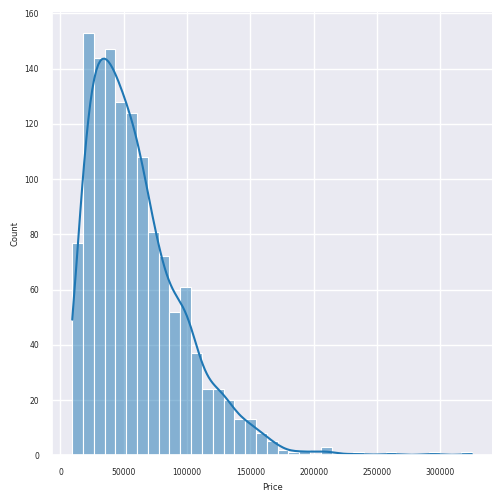

In [9]:
sns.set_theme(palette='tab10',font_scale=0.5)
sns.displot(data=df, x='Price', kde=True)

From the distribution above it can be seen that data is skewed i.e some laptops have very high prices but most of them lie between 10K to 100K

Brand Distribution

<Axes: title={'center': 'Laptop Brands Distribution'}, xlabel='Brand', ylabel='Count'>

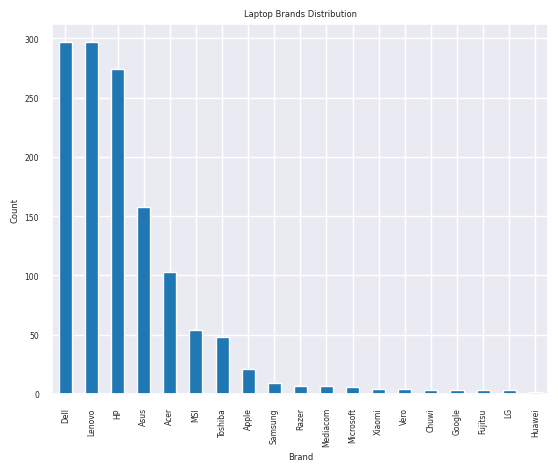

In [10]:
df['Company'].value_counts().plot(kind='bar', xlabel='Brand', ylabel='Count', title='Laptop Brands Distribution')

From the distribution above it can be seen that the dataset mostly contains laptops of Dell, Lenovo, HP, Asus, Acer, MSI, Toshiba and Apple.

Average Laptop Price Acorss DIfferent Brands

<Axes: title={'center': 'Average Laptop Price Acorss DIfferent Brands'}, xlabel='Company', ylabel='Average Price'>

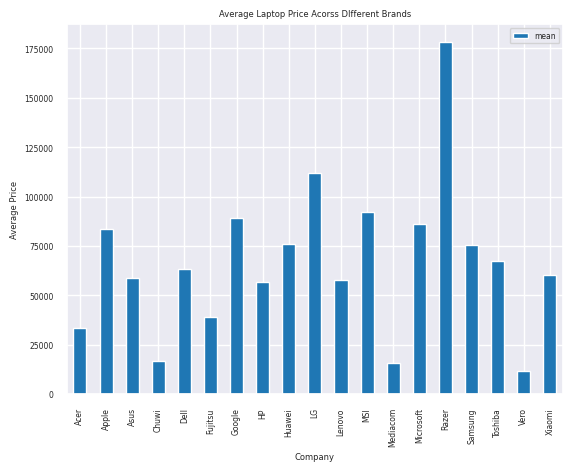

In [11]:
df.groupby('Company')['Price'].agg(['mean']).plot(kind='bar', ylabel='Average Price', title='Average Laptop Price Acorss DIfferent Brands')

Above distribution shows that Razer, LG, Apple, Google, MSI are expensive brands.

Different Types of Laptops

<Axes: title={'center': 'Distribution of Laptop Types'}, xlabel='Types', ylabel='Count'>

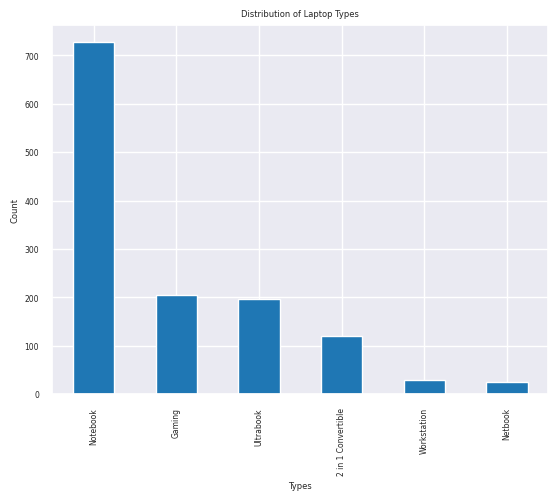

In [12]:
df['TypeName'].value_counts().plot(kind='bar', xlabel='Types', ylabel='Count', title='Distribution of Laptop Types')

Clearly, there are more than 700 notebooks in our dataset.

Average Price DIstribution Across Laptop Types

<Axes: title={'center': 'Average Price DIstribution Across Laptop Types'}, xlabel='TypeName', ylabel='Average Price'>

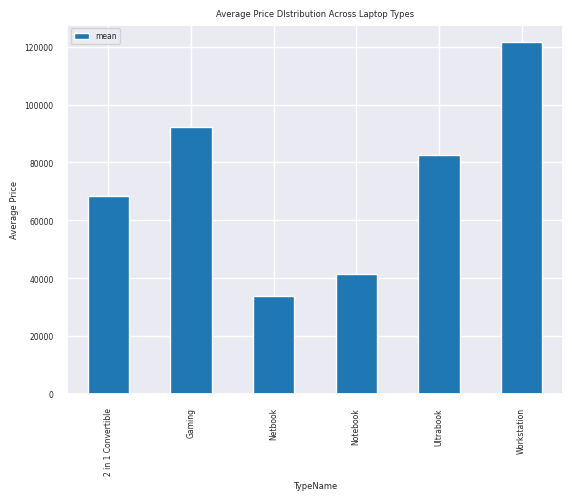

In [13]:
df.groupby('TypeName')['Price'].agg(['mean']).plot(kind='bar', ylabel='Average Price', title='Average Price DIstribution Across Laptop Types')

It can be seen that Workstation laptops are the most expensive then gaming laptops.

Screen Size vs Price

[Text(0.5, 1.0, 'Variation of Price with Screen Size')]

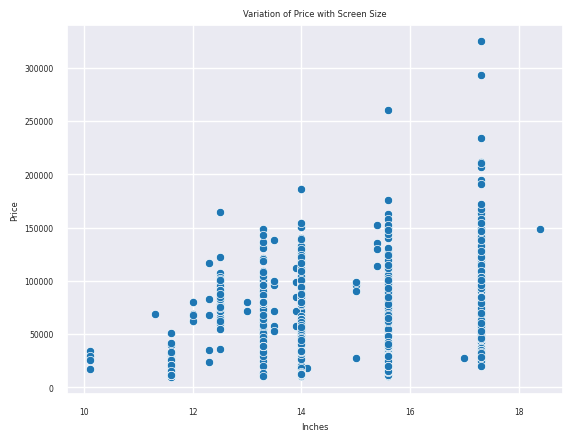

In [14]:
sns.scatterplot(data=df, x='Inches', y='Price').set(title='Variation of Price with Screen Size')

There is a slight relationship between Screen size and Price i.e small laptops tend to be cheaper while large laptops tend to be expensive.

### Feature Engineering & Analysis

Adding touchscreen column if ScreenResolution column contains the word touchscreen.

In [15]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if ('touchscreen' in x.lower()) or ('touch screen' in x.lower()) else 0)
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
196,Razer,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,324954.7200,1
485,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.75,55890.7200,0
212,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,No OS,2.10,18594.7200,0
175,Dell,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.30,24455.5200,0
378,Asus,Notebook,14.0,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.50,15238.0800,0
303,Lenovo,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,2TB HDD,Nvidia GeForce 940MX,No OS,2.20,29250.7200,0
938,Dell,Ultrabook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.36,87325.9200,0
439,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Linux,2.00,29783.5200,0
720,Lenovo,Ultrabook,14.0,IPS Panel Quad HD+ 2560x1440,Intel Core i7 6500U 2.5GHz,8,512GB SSD,Intel HD Graphics 520,Windows 10,1.17,89864.1792,0
661,Lenovo,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,500GB HDD,Intel HD Graphics 500,Windows 10,2.20,22324.3200,0


Let's Analyze how many laptops have touchscreen.

<Axes: title={'center': 'Distribution of Touchscreen Laptops'}, xlabel='Touchscreen 1=Yes 0=No', ylabel='Count'>

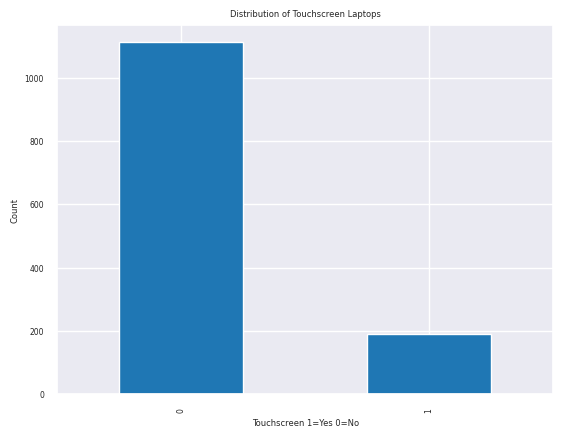

In [16]:
df['Touchscreen'].value_counts().plot(kind='bar', xlabel='Touchscreen 1=Yes 0=No', ylabel='Count', title='Distribution of Touchscreen Laptops')

Around 1100 laptops have touchscreen while 200 are non-touch

Variation in Price with Touchscreen

<Axes: title={'center': 'Variation in Price with Touchscreen'}, xlabel='Touchscreen 1=Yes 0=No', ylabel='Average Price'>

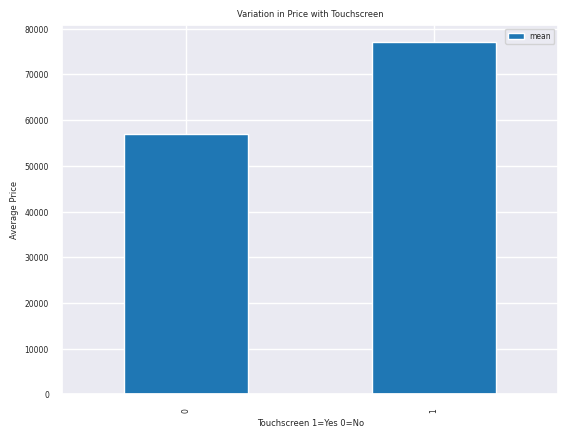

In [17]:
df.groupby('Touchscreen')['Price'].agg(['mean']).plot(kind='bar', xlabel='Touchscreen 1=Yes 0=No', ylabel='Average Price', title='Variation in Price with Touchscreen')

On average laptops with touchscreen tend to be expensive than laptops which dont have touchscreen.

Adding IPS column based on Screenresolution column if it contains the word IPS

In [18]:
df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if 'ips' in x.lower() else 0)
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1
210,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Linux,2.40,41505.1200,0,0
747,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.86,28717.9200,0,0
1230,Lenovo,Netbook,12.5,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.50GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,87912.0000,1,1
1135,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,16,1.0TB Hybrid,AMD Radeon R7 M360,Windows 10,2.50,58554.7200,0,0
449,Microsoft,Ultrabook,13.5,Touchscreen 2256x1504,Intel Core i7 7660U 2.5GHz,16,512GB SSD,Intel Iris Plus Graphics 640,Windows 10 S,1.25,137941.9200,1,0
972,Dell,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,32,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,149184.0000,0,0
267,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,1TB HDD,Intel HD Graphics 620,No OS,2.20,24881.7600,0,0
394,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,AMD Radeon R7 M445,Linux,2.33,41498.1936,0,0
118,Asus,Notebook,17.3,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.00,30049.9200,0,0


Now lets analyze how many laptops have IPS display

<Axes: title={'center': 'Distribution of laptops having IPS display'}, xlabel='IPS', ylabel='Count'>

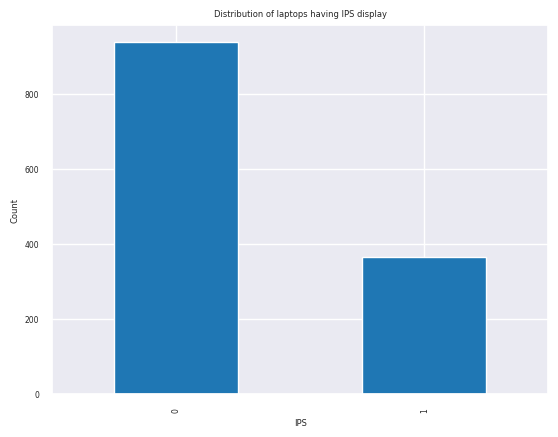

In [19]:
df['IPS'].value_counts().plot(kind='bar', xlabel='IPS', ylabel='Count', title='Distribution of laptops having IPS display')

Around 950 laptops do not offer IPS display.

Variation of Price with IPS display

<Axes: title={'center': 'How Price varies with IPS display'}, xlabel='IPS', ylabel='Average Price'>

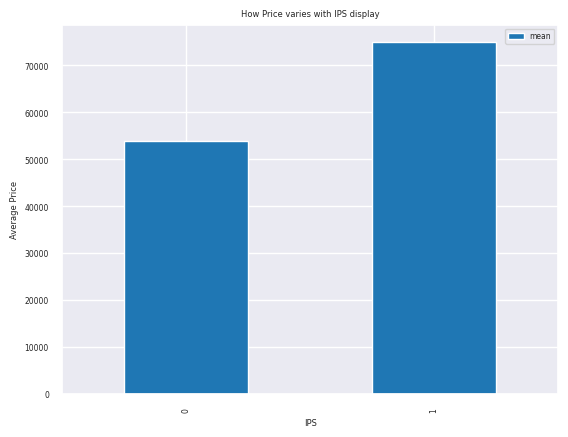

In [20]:
df.groupby('IPS')['Price'].agg(['mean']).plot(kind='bar', xlabel='IPS', ylabel='Average Price', title='How Price varies with IPS display')

Extracting X and Y resolution from ScreenResolution column

To extract X and Y resolution from ScreenREsolution Column i am going to use a regular expression i.e '(\d+)x(\d+)' to extract the numeric values before and after the 'x' in the "ScreenResolution" column. The astype(int) converts the extracted values to integers.

In [21]:
df[['X_resolution', 'Y_resolution']] = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)').astype(int)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_resolution,Y_resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


Let's analyze the correlation of different columns with Price.

In [22]:
df.corr()['Price']

<ipython-input-22-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
IPS             0.252208
X_resolution    0.556529
Y_resolution    0.552809
Name: Price, dtype: float64

Since the correlation of Price with Inches is too weak and there is colinearity because of X and Y resolution. It may make difficulties when predicting price with these features therefore I am going to unify three columns namely Inches, X_resolution, Y_resolution into one column namely PPI. The formula to calculate ppi is following.

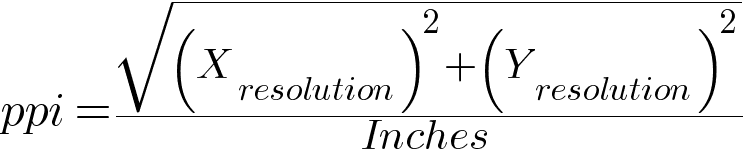

In [23]:
df['PPI'] = (((df['X_resolution']**2 + df['Y_resolution']**2) ** (1/2))/df['Inches']).astype(float)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_resolution,Y_resolution,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


Because I have already extracted everything from ScreenResolution column and unified X, Y and Inches column into PPI. There is no benefit of keeping these columns.

In [24]:
df.drop(columns=['X_resolution', 'Y_resolution', 'ScreenResolution', 'Inches'], inplace=True)
df.corr()['Price']

<ipython-input-24-322b1bd626bb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
PPI            0.473487
Name: Price, dtype: float64

In [25]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


I also need to engineer CPU column, but before that let's see how many unique values does this column have.

In [26]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

It is impossible to keep all these categories for modeling. Let's divide them into few different categories.

In [27]:
df['CPU Name'] = df['Cpu'].apply(lambda x: ' '.join(x.split()[0:3]))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [28]:
df['CPU Name'].value_counts()

Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1
AMD A6-S

Now lets engineer CPU Name column

In [29]:
intels = ['Intel Core i7', 'Intel Core i5', 'Intel Core i3']
def get_processor_name(text):
    if text in intels:
        return text
    elif text.split()[0] == 'Intel':
        return 'Other Intel Processor'
    elif text.split()[0] == 'Samsung':
        return 'Samsung'
    else:
        return 'AMD Processor'

Now I am going to apply the get_processor_name function to each entry of CPU Name column by using .apply() method

In [30]:
df['CPU Name'] = df['CPU Name'].apply(get_processor_name)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


Let's plot the CPU Name distribution using bar chart.

<Axes: title={'center': 'CPU Name Distribution'}, xlabel='Processor', ylabel='Count'>

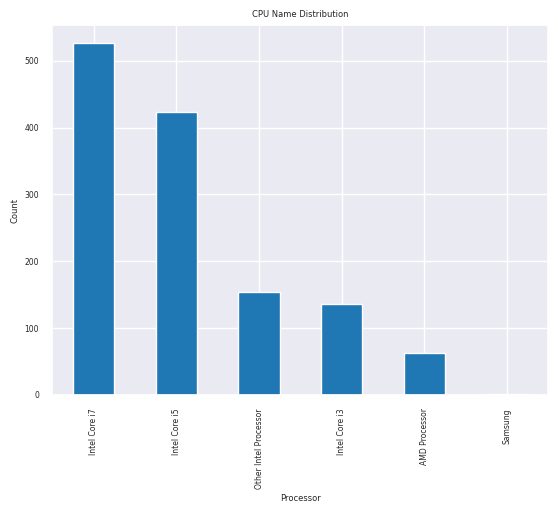

In [31]:
df['CPU Name'].value_counts().plot(kind='bar', xlabel='Processor', ylabel='Count', title='CPU Name Distribution')

It can be seen that most of the laptops contain Intel Core i7 and Intel Core i5.

Price analysis across different processors.

<Axes: title={'center': 'Average Prices of Different Processors.'}, xlabel='Processor', ylabel='Average Price'>

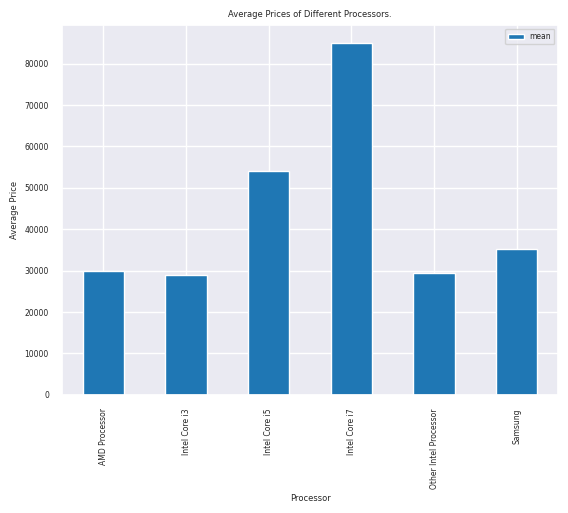

In [32]:
df.groupby('CPU Name')['Price'].agg(['mean']).plot(kind='bar', xlabel='Processor', ylabel='Average Price', title="Average Prices of Different Processors.")

Now let's extract the processor speed from Cpu column using regular expression.

In [33]:
df['GHz'] = df['Cpu'].str.extract(r'(\d+(\.\d+)?)GHz')[0].astype(float)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Name,GHz
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,2.3
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,1.8
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,2.5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,2.7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,3.1


In [34]:
df.corr()['Price']

<ipython-input-34-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
PPI            0.473487
GHz            0.430293
Name: Price, dtype: float64

There is considerable correlation between GHz and Price.

Let's Analyze RAM column

<Axes: title={'center': 'Average Price across RAM'}, xlabel='RAM', ylabel='Average Price'>

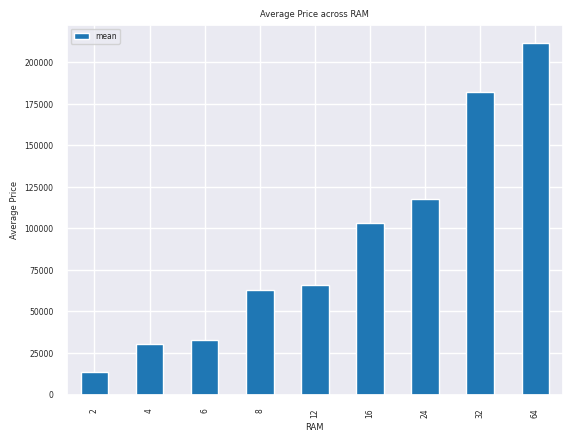

In [35]:
df.groupby('Ram')['Price'].agg(['mean']).plot(kind='bar', xlabel='RAM', ylabel='Average Price', title="Average Price across RAM")

As expected, the variation is pretty much linear. Prices increase with more RAM.

Now its time to feature engineer the Memory column. Before doing that it's important to see how many unique values are in there.

In [36]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

There are 40 unique values in this column and we cannot feed all these values as they are to a machine learning model. So i am going to to do the following steps.

- Replace decimal points with empty string, GB with empty string, TB with '000'.

- Split the column on + character

- Created 4 new columns with values 0 and 1 based on the category they fall into.

- Multiplied the actual values of storage with all the 4 columns 1s and 0s in them.

- Dropped the intermediate columns

In [37]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0].str.strip()
df["second"]= new[1]

df[['first', 'second']]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')
df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

df.head()

<ipython-input-37-9eba402837f8>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
<ipython-input-37-9eba402837f8>:24: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Name,GHz,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,2.3,0,128,0,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,1.8,0,0,0,128
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,2.5,0,256,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,2.7,0,512,0,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,3.1,0,256,0,0


Now let's also drop the memory column as we have already etracted the required data from the column.

In [38]:
df.drop(columns=['Memory'], inplace=True)
df.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Name,GHz,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,2.3,0,128,0,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,1.8,0,0,0,128
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,2.5,0,256,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,2.7,0,512,0,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,3.1,0,256,0,0


Let's check the correlation again

In [39]:
df.corr()['Price']

<ipython-input-39-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252208
PPI              0.473487
GHz              0.430293
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

because there is so weak correlation between hybrid, flash storage with price therefore dropping these columns.

In [40]:
df.drop(columns=['Cpu', 'Hybrid', 'Flash_Storage'], inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Name,GHz,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,2.3,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,1.8,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,2.5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,2.7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,3.1,0,256


Now let's analyze the gpu column

In [41]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

As there are 110 different values in Gpu column, and we can't keep all those values therefore reducing the categories.

In [42]:
df['Gpu'] = df['Gpu'].apply(lambda x: x.split()[0] + ' ' + x.split()[1])

In [43]:
df['Gpu'].value_counts()

Intel HD          639
Nvidia GeForce    368
AMD Radeon        173
Intel UHD          68
Nvidia Quadro      31
Intel Iris         14
AMD FirePro         5
AMD R4              1
Nvidia GTX          1
AMD R17M-M1-70      1
Intel Graphics      1
ARM Mali            1
Name: Gpu, dtype: int64

In [44]:
def cat_gpu(text):
  if text == 'Nvidia GTX':
    return 'Nvidia Quadro'
  elif text == 'AMD FirePro' or text == 'AMD R4' or text == 'AMD R17M-M1-70' or text == 'ARM Mali':
    return 'AMD Radeon'
  elif text == 'Intel Graphics':
    return 'Intel HD'
  else:
    return text


In [45]:
df['Gpu'] = df['Gpu'].apply(cat_gpu)
df['Gpu'].value_counts()

Intel HD          640
Nvidia GeForce    368
AMD Radeon        181
Intel UHD          68
Nvidia Quadro      32
Intel Iris         14
Name: Gpu, dtype: int64

<Axes: title={'center': 'Average Price across different GPUs'}, xlabel='GPU', ylabel='Average Price'>

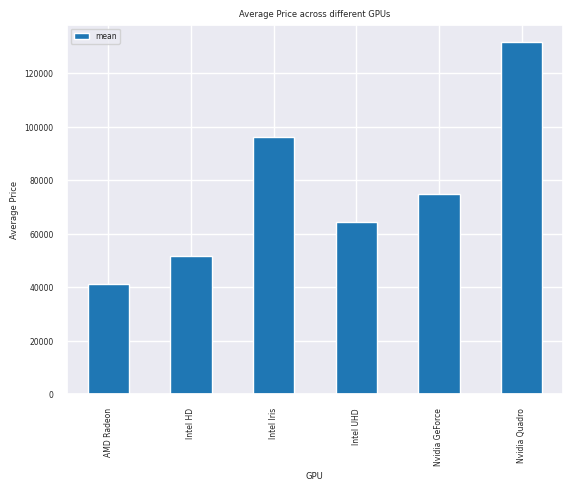

In [46]:
df.groupby('Gpu')['Price'].agg(['mean']).plot(kind='bar', xlabel='GPU', ylabel='Average Price', title="Average Price across different GPUs")

In [47]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Name,GHz,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,2.3,0,128
1,Apple,Ultrabook,8,Intel HD,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,1.8,0,0
2,HP,Notebook,8,Intel HD,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,2.5,0,256
3,Apple,Ultrabook,16,AMD Radeon,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,2.7,0,512
4,Apple,Ultrabook,8,Intel Iris,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,3.1,0,256


Now let's analyze OpSys column

In [48]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

we need to reduce the categories somehow

In [49]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Chrome OS/Linux/Others'

In [50]:
df['os'] = df['OpSys'].apply(cat_os)

In [51]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Name,GHz,HDD,SSD,os
0,Apple,Ultrabook,8,Intel Iris,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,2.3,0,128,Mac
1,Apple,Ultrabook,8,Intel HD,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,1.8,0,0,Mac
2,HP,Notebook,8,Intel HD,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,2.5,0,256,Chrome OS/Linux/Others
3,Apple,Ultrabook,16,AMD Radeon,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,2.7,0,512,Mac
4,Apple,Ultrabook,8,Intel Iris,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,3.1,0,256,Mac


In [52]:
df.drop(columns=['OpSys'], inplace=True)

<Axes: title={'center': 'Average Price across different OS'}, xlabel='OS', ylabel='Average Price'>

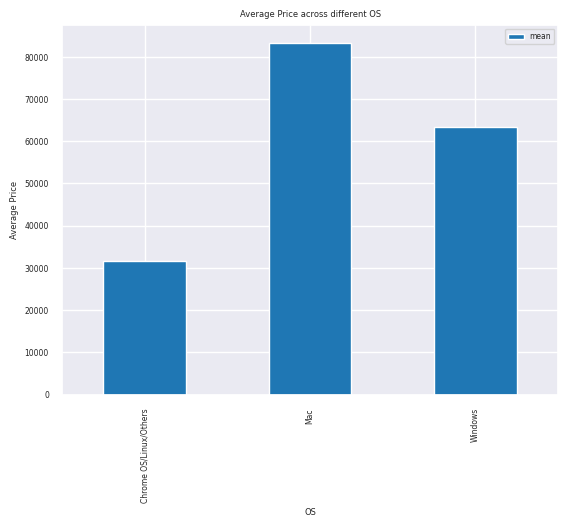

In [53]:
df.groupby('os')['Price'].agg(['mean']).plot(kind='bar', xlabel='OS', ylabel='Average Price', title="Average Price across different OS")

The last column to analyze is the weight column. So let's do some analysis on this column

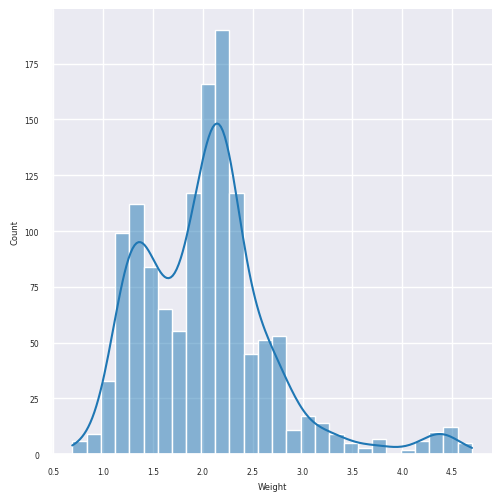

In [54]:
sns.displot(x='Weight', data=df, kde=True)

<Axes: xlabel='Weight', ylabel='Price'>

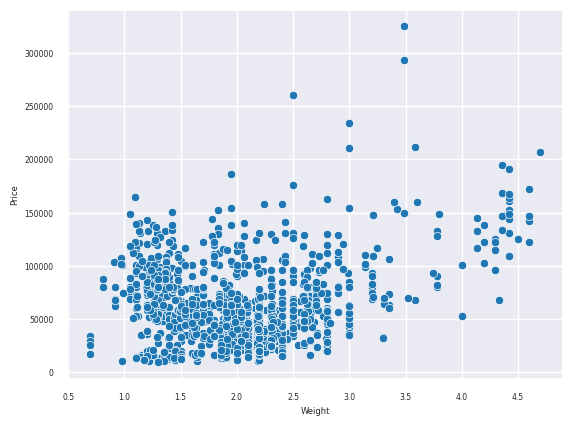

In [55]:
sns.scatterplot(x='Weight',y='Price', data=df)

This visualization implies a very weak linear relationship between weight and Price columns

Now let's analyze the correlation of all the columns with one another by using seaborn's heatmap

<ipython-input-56-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

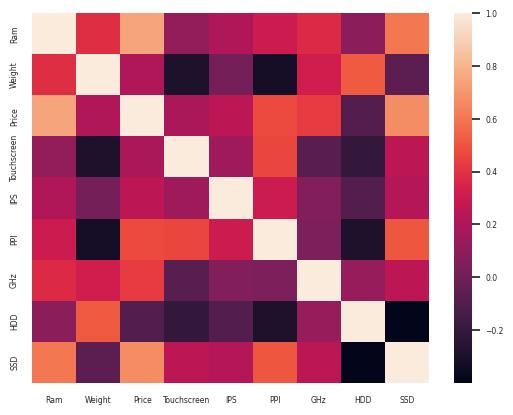

In [56]:
sns.heatmap(df.corr())

the last task before model building is to reanalyze the Price column as it is skewed, we have to apply transformation to this column.

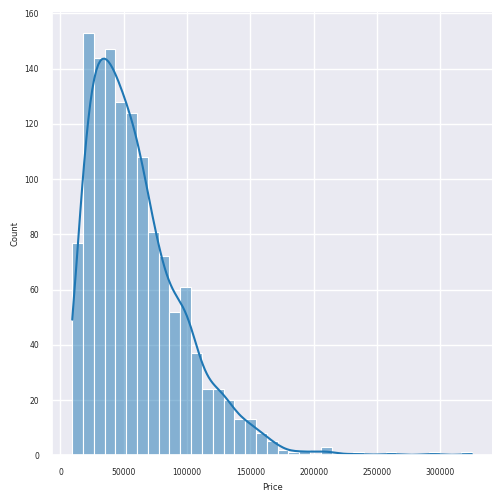

In [57]:
sns.displot(x='Price', data=df, kde=True)

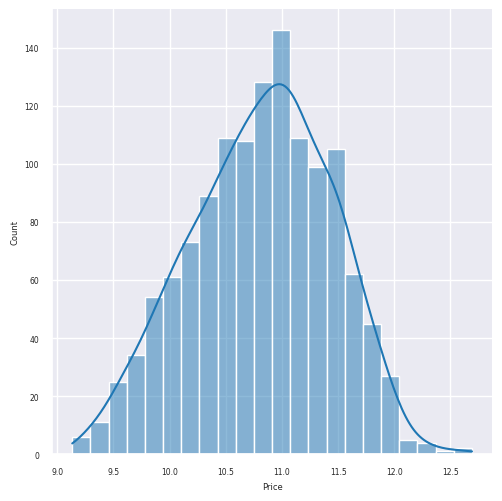

In [58]:
sns.displot(x=np.log(df['Price']), kde=True)

### Modeling

Now its time to extract the features and labels column from our dataframe into X and y

In [59]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [60]:
X.head()


,Company,TypeName,Ram,Gpu,Weight,Touchscreen,IPS,PPI,CPU Name,GHz,HDD,SSD,os
0,Apple,Ultrabook,8,Intel Iris,1.37,0,1,226.983005,Intel Core i5,2.3,0,128,Mac
1,Apple,Ultrabook,8,Intel HD,1.34,0,0,127.677940,Intel Core i5,1.8,0,0,Mac
2,HP,Notebook,8,Intel HD,1.86,0,0,141.211998,Intel Core i5,2.5,0,256,Chrome OS/Linux/Others
3,Apple,Ultrabook,16,AMD Radeon,1.83,0,1,220.534624,Intel Core i7,2.7,0,512,Mac
4,Apple,Ultrabook,8,Intel Iris,1.37,0,1,226.983005,Intel Core i5,3.1,0,256,Mac


In [61]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1303, dtype: float64

Now let's split our dataset into training and test set by using sklearn.train_test_split function

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2, stratify=X['Gpu'])

Importing the required tools and models for training.

In [63]:
X_train['Gpu'].value_counts()

Intel HD          544
Nvidia GeForce    312
AMD Radeon        154
Intel UHD          58
Nvidia Quadro      27
Intel Iris         12
Name: Gpu, dtype: int64

In [64]:
X_test['Gpu'].value_counts()

Intel HD          96
Nvidia GeForce    56
AMD Radeon        27
Intel UHD         10
Nvidia Quadro      5
Intel Iris         2
Name: Gpu, dtype: int64

In [65]:
!pip install xgboost==2.0.3

In [66]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
# models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor,StackingRegressor

Now i am going to use each of these model with a pipeline having 2 steps.
1. Transform columns using ColumnTransformer
2. Fit model on tranformed columns.

In [67]:
X_train.head()

,Company,TypeName,Ram,Gpu,Weight,Touchscreen,IPS,PPI,CPU Name,GHz,HDD,SSD,os
983,Fujitsu,Notebook,4,Intel HD,2.30,0,0,100.454670,Intel Core i5,2.3,0,256,Windows
785,MSI,Gaming,16,Nvidia GeForce,1.60,0,1,157.350512,Intel Core i7,2.8,1000,256,Windows
507,Acer,Notebook,4,Nvidia GeForce,2.20,0,1,141.211998,Intel Core i5,1.6,1000,0,Windows
746,Samsung,Ultrabook,16,Intel HD,0.81,0,0,165.632118,Intel Core i7,2.7,0,256,Windows
1005,HP,Notebook,4,Intel HD,1.48,0,0,111.935204,Intel Core i5,2.4,0,256,Windows


In [68]:
col_transform = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,12])
],remainder='passthrough')

#### Decision Tree

A Decision Tree is a way of making decisions by breaking down a problem into a series of simple, yes-or-no questions. It's like a flowchart where each question leads to further questions, eventually leading to a decision or prediction at the bottom. Think of it as a roadmap for systematically navigating through possibilities to reach an outcome.

In [69]:
model = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('col_transform',col_transform),
    ('model', model)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8204847987056004
MAE 0.20571393418760991


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### Random Forest

A Random Forest is like a team of decision trees working together. Instead of relying on a single decision tree, it creates a "forest" by combining the predictions of many trees. Each tree in the forest gets a vote, and the final prediction is the most popular choice.

In [70]:
model = RandomForestRegressor(n_estimators=350,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=20)

pipe = Pipeline([
    ('col_transform',col_transform),
    ('model', model)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8914439612980678
MAE 0.16098246838509142


#### ExtraTrees

ExtraTrees, short for Extremely Randomized Trees, is like a group of decision trees that take a more relaxed approach. Instead of carefully selecting the best features to split on, ExtraTrees randomly chooses features for each decision point. It's like having a bunch of carefree decision-makers, and their combined wisdom helps make predictions by considering various possibilities. This randomness can often lead to a more diverse and robust model.

In [71]:
model = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              bootstrap=True,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('col_transform',col_transform),
    ('model', model)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8731583970197487
MAE 0.17491166732396785


#### Gradient Boosting Regressor

Gradient Boosting is like a team of learners trying to improve over time. It builds a predictive model by combining the strengths of multiple simpler models, called weak learners. Each new model focuses on correcting the errors of the previous ones, gradually improving overall accuracy. It's like a team effort where each member learns from the mistakes of the others, making the entire team better at predicting outcomes.

In [72]:
model = GradientBoostingRegressor(n_estimators=500, max_features=0.5)

pipe = Pipeline([
    ('col_transform',col_transform),
    ('model', model)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.9183844736651469
MAE 0.14279349051367954


#### XGBoost Regressor

XGBoost, short for Extreme Gradient Boosting, is like a supercharged team of learners. It's an advanced form of gradient boosting that includes additional optimizations for efficiency and performance. XGBoost uses a combination of weak learners, usually decision trees, and applies a clever strategy to boost their accuracy.

In [73]:
model = XGBRegressor(n_estimators=100,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('col_transform',col_transform),
    ('model', model)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8941901892497417
MAE 0.15937843109098004


In [74]:
rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=20)
gbdt = GradientBoostingRegressor(n_estimators=500,max_features=0.5)
xgb = XGBRegressor(n_estimators=100,max_depth=5,learning_rate=0.5)

estimators = [
    ('rf', rf),
    ('gbdt',gbdt),
    ('xgb', xgb)
]

#### Voting Regressor

In machine learning, a Voting Regressor is an ensemble method that combines the predictions of multiple regression models. Each model gets an equal say, and the final prediction is determined by averaging or taking a weighted average of their individual predictions

In [75]:
model = VotingRegressor(estimators, weights=[4,8,5])

pipe = Pipeline([
    ('col_transform',col_transform),
    ('model', model)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.917875499812905
MAE 0.14286262962359556


Time to test our model on real world laptops

In [76]:
input = np.array([
    'MSI',
    'Gaming',
    32,
    'Nvidia GeForce',
    2.2,
    0,
    1,
    165.632118,
    'Intel Core i7',
    2.7,
    1000,
    512,
    'Windows'
], dtype = 'object')

input = input.reshape(1, 13)
print(np.exp(pipe.predict(input)[0]))

118980.14344334994


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


Because the voting regressor performed the best, i am going to export it

In [77]:
df.to_csv('cleaned_data.csv', index=False)

import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

###Recommendation Model

I am going to use Scikit learn's Nearest Neabors to get 5 closest recommendation of any laptop based on its features.

In [78]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

loading cleaned data for recommendation model

In [79]:
cleaned_df = pd.read_csv('cleaned_data.csv')
cleaned_df.head()

,Company,TypeName,Ram,Gpu,Weight,Price,Touchscreen,IPS,PPI,CPU Name,GHz,HDD,SSD,os
0,Apple,Ultrabook,8,Intel Iris,1.37,71378.6832,0,1,226.983005,Intel Core i5,2.3,0,128,Mac
1,Apple,Ultrabook,8,Intel HD,1.34,47895.5232,0,0,127.677940,Intel Core i5,1.8,0,0,Mac
2,HP,Notebook,8,Intel HD,1.86,30636.0000,0,0,141.211998,Intel Core i5,2.5,0,256,Chrome OS/Linux/Others
3,Apple,Ultrabook,16,AMD Radeon,1.83,135195.3360,0,1,220.534624,Intel Core i7,2.7,0,512,Mac
4,Apple,Ultrabook,8,Intel Iris,1.37,96095.8080,0,1,226.983005,Intel Core i5,3.1,0,256,Mac


The reason why I loaded original data is that after getting indices of closest laptops i am going to extract them from original data instead of cleaned data.

In [80]:
original_df = pd.read_csv('laptop_data.csv')
original_df.drop(columns=['Unnamed: 0'], inplace=True)
original_df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


Here first I insert the new entry in cleaned_df and store new DataFrame in df1. Then it is dummified and scaled using MinMaxScaler. Then I fit Nearest Neibour model on this dummified and scaled DataFrame with n_neighbors = 6 to get 5 closest recommendation. Then i get indices of 5 closest laptops for every laptop in indices 2D numpy array which I sliced to get the last row to get the recommendation of newly inserted entry which is then returned by get_recommendations function.

In [81]:
def get_recommendations(company, typename, ram, gpu, weight, price, touchscreen, ips, ppi, cpu, ghz, hdd, ssd, os):
    df1 = cleaned_df.append({
        'Company': company,
        'TypeName': typename,
        'Ram': ram,
        'Gpu': gpu,
        'Weight': weight,
        'Price': price,
        'Touchscreen': touchscreen,
        'IPS': ips,
        'PPI': ppi,
        'CPU Name': cpu,
        'GHz': ghz,
        'HDD': hdd,
        'SSD': ssd,
        'os': os
    }, ignore_index=True)
    df1_dummies = pd.get_dummies(df1, drop_first=True)
    df1_dummies = MinMaxScaler().fit_transform(df1_dummies)
    nbrs = NearestNeighbors(n_neighbors=6, algorithm='ball_tree').fit(df1_dummies)
    distances, indices = nbrs.kneighbors(df1_dummies)
    print(indices)
    closest = indices[-1][1:]
    return original_df.iloc[closest]

In [82]:
get_recommendations('Apple', 'Ultrabook', 4, 'Intel Iris', 1.37, 100000, 0, 1, 127.0, 'Intel Core i7', 3.0, 0, 512, 'Mac')

[[   0   15   45    4  270  249]
 [   1    7   34   26 1234   81]
 [   2 1056   10 1164   64   87]
 ...
 [1287 1273 1301  667  229  100]
 [1288 1274 1172 1302  465 1225]
 [1303    6    3   17   12  270]]


<ipython-input-81-d675377eaca9>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = cleaned_df.append({


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,114017.6016
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
17,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.9GHz,16GB,512GB SSD,AMD Radeon Pro 560,macOS,1.83kg,152274.2400
12,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.8GHz,16GB,256GB SSD,AMD Radeon Pro 555,macOS,1.83kg,130001.6016
270,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.9GHz,8GB,512GB SSD,Intel Iris Graphics 550,macOS,1.37kg,104370.1920
